In [2]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from iterative_heuristic.consolidated import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [3]:
# Construct DAGs

file_list = ['cycles-chameleon-1l-1c-9p-001.json',
'cycles-chameleon-1l-1c-12p-001.json',
'cycles-chameleon-1l-2c-9p-001.json',
'cycles-chameleon-1l-2c-12p-001.json',
'cycles-chameleon-1l-3c-9p-001.json',
'cycles-chameleon-1l-3c-12p-001.json',
'cycles-chameleon-2l-1c-9p-001.json',
'cycles-chameleon-2l-1c-12p-001.json',
'cycles-chameleon-2l-2c-9p-001.json',
'cycles-chameleon-2l-2c-12p-001.json',
'cycles-chameleon-2l-3c-9p-001.json',
'cycles-chameleon-2l-3c-12p-001.json',
'cycles-chameleon-5l-1c-9p-001.json',
'cycles-chameleon-5l-1c-12p-001.json',
'cycles-chameleon-5l-2c-9p-001.json',
'cycles-chameleon-5l-2c-12p-001.json',
'cycles-chameleon-5l-3c-9p-001.json',
'cycles-chameleon-5l-3c-12p-001.json',
'cycles-chameleon-10l-1c-9p-001.json',
'cycles-chameleon-10l-1c-12p-001.json',
'cycles-chameleon-10l-2c-9p-001.json',
'cycles-chameleon-10l-2c-12p-001.json',
'cycles-chameleon-10l-3c-9p-001.json',
'cycles-chameleon-10l-3c-12p-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/cycles/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

67
219
134
438
201
657
133
437
266
874
399
1311
331
1091
662
2182
993
3273
661
2181
1322
4362
1983
6543


In [4]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1,naive2, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=4, verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    naives2.append(naive2)
    print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

436.0169642297627 497.84545017394436
______________________________________________________
2520.1464019944856 4169.220151691228
______________________________________________________
1212.9748620021217 1689.985680448004
______________________________________________________
7091.521359285227 15683.270420976887
______________________________________________________
2217.013826103615 3576.6284381896485
______________________________________________________
13006.781684008149 34544.27212820063
______________________________________________________
1199.558454137123 1664.2269077357648
______________________________________________________
7067.35526733804 15604.323556697016
______________________________________________________
3366.7104466995247 6058.953915074957
______________________________________________________
19940.472054362515 60438.609389118224
______________________________________________________
6168.6953485329295 13184.18102201758
___________________________________________

In [5]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [67, 219, 134, 438, 201, 657, 133, 437, 266, 874, 399, 1311, 331, 1091, 662, 2182, 993, 3273, 661, 2181, 1322, 4362, 1983, 6543]
ubs are 
 [562.7708469792087, 2973.0377382079346, 1572.4101055240058, 8487.810244650329, 2622.9340452336774, 15172.79925989423, 1552.1480978582242, 8456.06282785852, 4382.543317807464, 24337.112203852954, 7386.888545159946, 43253.67208033002, 6085.949592113272, 33958.33376569274, 17202.91223787014, 96303.14555737647, 29121.81614494891, 171805.7556707266, 17155.469387244757, 96211.22029667856, 48524.349641490546, 272495.229578027, 82294.90669174345, 486737.6548789448]
naives1 are 
 [436.0169642297627, 2520.1464019944856, 1212.9748620021217, 7091.521359285227, 2217.013826103615, 13006.781684008149, 1199.558454137123, 7067.35526733804, 3366.7104466995247, 19940.472054362515, 6168.6953485329295, 36602.622867373575, 4666.07102408972, 27796.554115499148, 13155.240340842545, 78541.83604140328, 24141.41538791344, 144242.03288141682, 13125.508203347912, 78487.8

In [6]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[1.0013709544372396, 0.9999538747920735, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.143368296423018, 1.6542800220834006, 1.3932569696115005, 2.211552306818074, 1.6132639301016656, 2.655866221747448, 1.387366244634482, 2.2079438441156043, 1.799665878904053, 3.0309517861135915, 2.1372721908131043, 3.6746781230575336, 1.9692261129787316, 3.364621479715058, 2.680656215653445, 4.700149618703566, 3.240422418914864, 5.732729056373269, 2.6775794080955313, 4.698443255628681, 3.7125896140444774, 6.603440771715203, 4.516688848249523, 8.070721694938046]


In [3]:
ratios1 = [1.0013709544372396, 0.9999538747920735, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ratios2 = [1.143368296423018, 1.6542800220834006, 1.3932569696115005, 2.211552306818074, 1.6132639301016656, 2.655866221747448, 1.387366244634482, 2.2079438441156043, 1.799665878904053, 3.0309517861135915, 2.1372721908131043, 3.6746781230575336, 1.9692261129787316, 3.364621479715058, 2.680656215653445, 4.700149618703566, 3.240422418914864, 5.732729056373269, 2.6775794080955313, 4.698443255628681, 3.7125896140444774, 6.603440771715203, 4.516688848249523, 8.070721694938046]
x = [67, 219, 134, 438, 201, 657, 133, 437, 266, 874, 399, 1311, 331, 1091, 662, 2182, 993, 3273, 661, 2181, 1322, 4362, 1983, 6543]

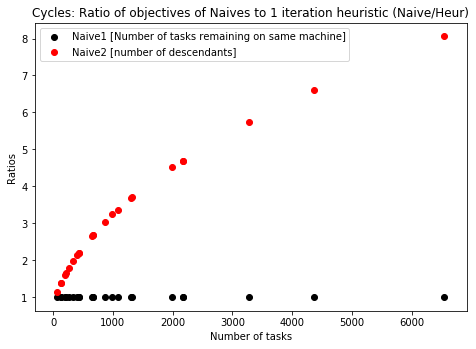

In [4]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("Cycles: Ratio of objectives of Naives to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [8]:
import csv
with open("cycles_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))